In [17]:
!wget -r -N -c -np https://physionet.org/files/ludb/1.0.0/


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
File ‘physionet.org/files/ludb/1.0.0/34.hea’ not modified on server. Omitting download.

--2020-12-05 07:04:05--  https://physionet.org/files/ludb/1.0.0/35.atr_avf
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modified
File ‘physionet.org/files/ludb/1.0.0/35.atr_avf’ not modified on server. Omitting download.

--2020-12-05 07:04:05--  https://physionet.org/files/ludb/1.0.0/35.atr_avl
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modified
File ‘physionet.org/files/ludb/1.0.0/35.atr_avl’ not modified on server. Omitting download.

--2020-12-05 07:04:05--  https://physionet.org/files/ludb/1.0.0/35.atr_avr
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 304 Not Modified
File ‘physionet.org/files/ludb/1.0.0/35.atr_avr’ not modified on server. Omitting download.

--2020-12-05 07:04:05--  https://physionet.org/fil

In [18]:
!pip install wfdb

In [19]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
import re
import wfdb
from wfdb import processing

data_dir = Path('/content/physionet.org/files/ludb/1.0.0')

num_records = 200
records = []
for i in range(1,num_records+1):
    record = wfdb.io.rdrecord(f'{data_dir}/{i}')
    age = 99 if record.comments[0][7:] == '>89' else int(record.comments[0][7:])
    data = {'id': i,
            'age(10)' : age //10 * 10, 
            'sex':record.comments[1][-1],
            'dignosis':record.comments[3:]}
    cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']
    for col, j in zip(cols, range(12)):
        ann = wfdb.rdann(f'{data_dir}/{i}', f'atr_{col}')
        data[col] = {'singal':record.p_signal[:, j], 'anno': ann.__dict__['symbol'], 'anno_idx': ann.__dict__['sample']}
    records.append(data)

In [ ]:
print(records)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dignosis = []
for i in range(1,num_records+1):
    record = wfdb.io.rdrecord(f'{data_dir}/{i}')
    # age = 99 if record.comments[0][7:] == '>89' else int(record.comments[0][7:])
    data = {'dignosis':record.comments[3:]}
    
    dignosis.append(data)

In [ ]:
dignosis

[{'dignosis': ['Electric axis of the heart: left axis deviation.',
   'Left ventricular hypertrophy.',
   'Left ventricular overload.',
   'Non-specific repolarization abnormalities: posterior wall.']},
 {'dignosis': ['Electric axis of the heart: normal.',
   'Left atrial hypertrophy.',
   'Left ventricular hypertrophy.',
   'Non-specific repolarization abnormalities: posterior wall.']},
 {'dignosis': ['Electric axis of the heart: vertical.',
   'Left atrial hypertrophy.',
   'Left ventricular hypertrophy.',
   'Ischemia: lateral wall.',
   'Ischemia: inferior wall.']},
 {'dignosis': ['Electric axis of the heart: left axis deviation.',
   'Incomplete right bundle branch block.',
   'Left atrial hypertrophy.',
   'Left ventricular hypertrophy.',
   'Ischemia: inferior wall.',
   'Scar formation: inferior wall.',
   'Undefined ischemia/scar/supp.NSTEMI: inferior wall.']},
 {'dignosis': ['Electric axis of the heart: horizontal.',
   'Left atrial hypertrophy.',
   'Non-specific repolarizat

In [ ]:
import matplotlib.pyplot as plt

records = []
for i in range(1,num_records+1):
    record = wfdb.io.rdrecord(f'{data_dir}/{i}')
    age = 99 if record.comments[0][7:] == '>89' else int(record.comments[0][7:])
    data = {'id': i,
            'age(10)' : age //10 * 10, 
            'sex':record.comments[1][-1],
            'dignosis':record.comments[3:]}
    cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']
    for col, j in zip(cols, range(12)):
        ann = wfdb.rdann(f'{data_dir}/{i}', f'atr_{col}')
        data[col] = {'singal':record.p_signal[:, j], 'anno': ann.__dict__['symbol'], 'anno_idx': ann.__dict__['sample']}
    records.append(data)

In [ ]:
print(records[0]['i']['singal'])

[-120.00523697  -42.99554857   35.0091647  ...  -63.99581042  -57.00445143
  -66.01204504]


In [ ]:
print(records[0]['i']['anno_idx'])

[ 641  664  690  773  840  887 1252 1282 1301 1324 1344 1374 1457 1519
 1567 1911 1938 1961 1980 2002 2028 2118 2176 2219 2538 2581 2604 2624
 2645 2670 2758 2820 2864 3224 3252 3278 3297 3316 3340 3434 3491 3534
 3882 3908 3937 3953 3971 3996]


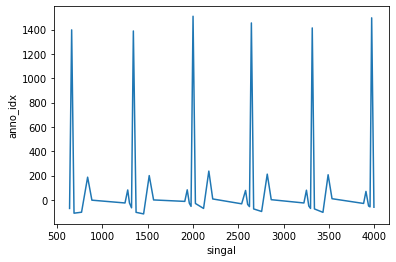

In [ ]:
x_arr = []

for i in range(len(records[0]['i']['anno_idx'])):  
  x_arr.append(records[0]['i']['singal'][records[0]['i']['anno_idx'][i]])

y_arr = records[0]['i']['anno_idx']

plt.plot(y_arr, x_arr)
plt.xlabel("singal")
plt.ylabel("anno_idx")
plt.show()

In [ ]:
## 하나의 자료 ECG signal
'''
x_arr = []

for i in range(len(records[0]['i']['anno_idx'])):  
  x_arr.append(records[0]['i']['singal'][records[0]['i']['anno_idx'][i]])
'''
temp = []
num_records = 200
for i in range(1,num_records+1):
    record = wfdb.io.rdrecord(f'{data_dir}/{i}')
    data = {'id': i,
            'dignosis':record.comments[3:]}
    cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']
    for col, j in zip(cols, range(12)):
        ann = wfdb.rdann(f'{data_dir}/{i}', f'atr_{col}')
        data[col] = {'singal':record.p_signal[:, j], 'anno': ann.__dict__['symbol'], 'anno_idx': ann.__dict__['sample']}
    records.append(temp)

In [ ]:
temp

[]

In [ ]:
xarr = []
yarr = []
for i in range(5000):
  xarr.append(i)

for i in range(len(records[0]['i']['singal'])):
  yarr.append(records[0]['i']['singal'][i])

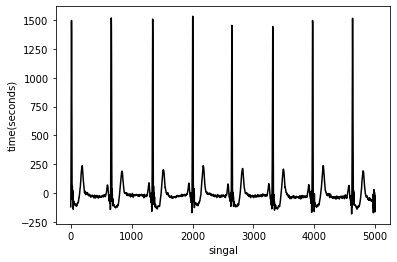

In [ ]:
plt.plot(xarr, yarr, color = "black")
plt.xlabel("singal")
plt.ylabel("time(seconds)")
plt.show()

In [ ]:
## N (qrs) 집합 ##

Narr = []
Nyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 0:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 2:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):  
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Narr.append(i)
    Nyarr.append(records[0]['i']['singal'][i])
  

In [ ]:
print(Narr)
print(Nyarr)

[641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651

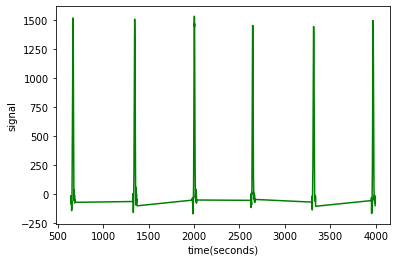

In [ ]:
plt.plot(Narr, Nyarr, "-", color = "green")
plt.xlabel("time(seconds)")
plt.ylabel("signal")
plt.show()

In [ ]:
## t 집합 ##

Tarr = []
Tyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 3:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 5:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Tarr.append(i)
    Tyarr.append(records[0]['i']['singal'][i])


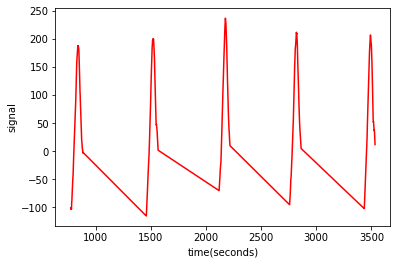

In [ ]:
plt.plot(Tarr, Tyarr, "-", color = "red")
plt.xlabel("time(seconds)")
plt.ylabel("signal")
plt.show()

In [ ]:
## p 집합 ##

Parr = []
Pyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 6:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 8:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Parr.append(i)
    Pyarr.append(records[0]['i']['singal'][i])


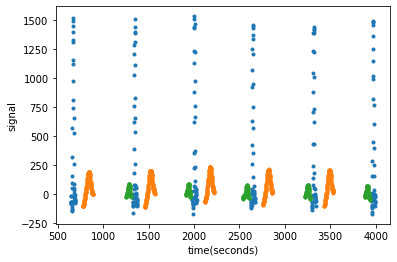

In [ ]:
plt.plot(Narr, Nyarr, ".", Tarr, Tyarr, ".", Parr, Pyarr, ".")
plt.xlabel("time(seconds)")
plt.ylabel("signal")
plt.show()

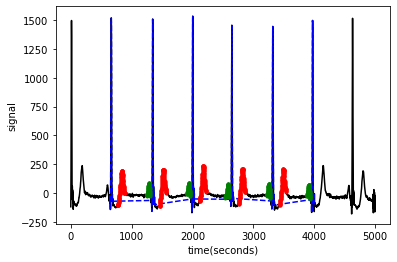

In [ ]:
plt.plot(xarr, yarr, color = "black")
plt.plot(Narr, Nyarr, "--", color = "blue")
plt.plot(Tarr, Tyarr, ".", color = "red")
plt.plot(Parr, Pyarr, ".", color = "green")
plt.xlabel("time(seconds)")
plt.ylabel("signal")
plt.show()

In [ ]:
## dataset 분석

print(records)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## id 1번
print(records[0]['i']['singal'])

[-120.00523697  -42.99554857   35.0091647  ...  -63.99581042  -57.00445143
  -66.01204504]


In [ ]:
len(records[0]['i']['singal'])

5000

In [ ]:
arr_signal = np.array(records[0]['i']['singal'])
arr_signal

array([-120.00523697,  -42.99554857,   35.0091647 , ...,  -63.99581042,
        -57.00445143,  -66.01204504])

첫번째 사람의 i leaf Data

In [ ]:
## p 집합 ##

Parr = []
Pyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 6:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 8:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Parr.append(i)
    Pyarr.append(records[0]['i']['singal'][i])

In [ ]:
## N (qrs) 집합 ##

Narr = []
Nyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 0:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 2:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):  
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Narr.append(i)
    Nyarr.append(records[0]['i']['singal'][i])
  

In [ ]:
## t 집합 ##

Tarr = []
Tyarr = []

start = []
end = []
for i in range(len(records[0]['i']['anno'])):
  if i % 9 == 3:
    start.append(records[0]['i']['anno_idx'][i])
  elif i % 9 == 5:
    end.append(records[0]['i']['anno_idx'][i])

def merge(list1, list2):      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

merged_list = merge(start, end)
merged_list

for (a, b) in merged_list:
  for i in range(a, b):
    Tarr.append(i)
    Tyarr.append(records[0]['i']['singal'][i])


In [ ]:
arr_p = np.zeros(len(records[0]['i']['singal']))
arr_qrs = np.zeros(len(records[0]['i']['singal']))
arr_t = np.zeros(len(records[0]['i']['singal']))
arr_ = np.zeros(len(records[0]['i']['singal']))

for i in range(len(records[0]['i']['singal'])):
  if i in Parr:
    arr_p[i] = 1

for i in range(len(records[0]['i']['singal'])):
  if i in Narr:
    arr_qrs[i] = 1

for i in range(len(records[0]['i']['singal'])):
  if i in Tarr:
    arr_t[i] = 1

for i in range(len(records[0]['i']['singal'])):
  if i not in Parr and i not in Narr and i not in Tarr:
    arr_[i] = 1

arr_signal = np.array(arr_signal)
arr_p = np.array(arr_p)
arr_qrs = np.array(arr_qrs)
arr_t = np.array(arr_t)
arr_ = np.array(arr_)


In [ ]:
npy1_1 = [arr_signal, arr_p, arr_qrs, arr_t, arr_]
npy1_1 = np.array(npy1_1)
npy1_1

array([[-120.00523697,  -42.99554857,   35.0091647 , ...,  -63.99581042,
         -57.00445143,  -66.01204504],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   1.        ,    1.        ,    1.        , ...,    1.        ,
           1.        ,    1.        ]])

In [ ]:
np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_1.npy', npy1_1)

첫번째 사람이 ii번째 leaf Data


In [ ]:
cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']

for _ in cols:
  print(_)
  ## p 집합 ##
  Parr = []
  Pyarr = []

  start = []
  end = []
  for i in range(len(records[0][_]['anno'])):
    if i % 9 == 6:
      start.append(records[0][_]['anno_idx'][i])
    elif i % 9 == 8:
      end.append(records[0][_]['anno_idx'][i])

  def merge(list1, list2):      
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Parr.append(i)
      Pyarr.append(records[0][_]['singal'][i])

  ## N (qrs) 집합 ##
  Narr = []
  Nyarr = []

  start = []
  end = []
  for i in range(len(records[0][_]['anno'])):
    if i % 9 == 0:
      start.append(records[0][_]['anno_idx'][i])
    elif i % 9 == 2:
      end.append(records[0][_]['anno_idx'][i])

  def merge(list1, list2):  
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Narr.append(i)
      Nyarr.append(records[0][_]['singal'][i])

  ## t 집합 ##
  Tarr = []
  Tyarr = []

  start = []
  end = []
  for i in range(len(records[0][_]['anno'])):
    if i % 9 == 3:
      start.append(records[0][_]['anno_idx'][i])
    elif i % 9 == 5:
      end.append(records[0][_]['anno_idx'][i])

  def merge(list1, list2):      
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Tarr.append(i)
      Tyarr.append(records[0][_]['singal'][i])



  arr_p = np.zeros(len(records[0][_]['singal']))
  arr_qrs = np.zeros(len(records[0][_]['singal']))
  arr_t = np.zeros(len(records[0][_]['singal']))
  arr_ = np.zeros(len(records[0][_]['singal']))

  for i in range(len(records[0][_]['singal'])):
    if i in Parr:
      arr_p[i] = 1

  for i in range(len(records[0][_]['singal'])):
    if i in Narr:
      arr_qrs[i] = 1

  for i in range(len(records[0][_]['singal'])):
    if i in Tarr:
      arr_t[i] = 1

  for i in range(len(records[0][_]['singal'])):
    if i not in Parr and i not in Narr and i not in Tarr:
      arr_[i] = 1

  arr_signal = np.array(arr_signal)
  arr_p = np.array(arr_p)
  arr_qrs = np.array(arr_qrs)
  arr_t = np.array(arr_t)
  arr_ = np.array(arr_)


  npy = [arr_signal, arr_p, arr_qrs, arr_t, arr_]
  npy = np.array(npy)
  npy

  if _ == 'i':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_1.npy', npy)
  elif _ == 'ii':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_2.npy', npy)
  elif _ == 'iii':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_3.npy', npy)
  elif _ == 'avr':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_4.npy', npy)
  elif _ == 'avl':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_5.npy', npy)
  elif _ == 'avf':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_6.npy', npy)
  elif _ == 'v1':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_7.npy', npy)
  elif _ == 'v2':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_8.npy', npy)
  elif _ == 'v3':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_9.npy', npy)
  elif _ == 'v4':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_10.npy', npy)
  elif _ == 'v5':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_11.npy', npy)
  elif _ == 'v6':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_12.npy', npy)

i
ii
iii
avr
avl
avf
v1
v2
v3
v4
v5
v6


2번째 사람

In [ ]:
cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']

for _ in cols:
  print(_)
  ## p 집합 ##
  Parr = []
  Pyarr = []

  start = []
  end = []
  for i in range(len(records[1][_]['anno'])):
    if i % 9 == 6:
      start.append(records[1][_]['anno_idx'][i])
    elif i % 9 == 8:
      end.append(records[1][_]['anno_idx'][i])

  def merge(list1, list2):      
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Parr.append(i)
      Pyarr.append(records[1][_]['singal'][i])

  ## N (qrs) 집합 ##
  Narr = []
  Nyarr = []

  start = []
  end = []
  for i in range(len(records[1][_]['anno'])):
    if i % 9 == 0:
      start.append(records[1][_]['anno_idx'][i])
    elif i % 9 == 2:
      end.append(records[1][_]['anno_idx'][i])

  def merge(list1, list2):  
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Narr.append(i)
      Nyarr.append(records[1][_]['singal'][i])

  ## t 집합 ##
  Tarr = []
  Tyarr = []

  start = []
  end = []
  for i in range(len(records[1][_]['anno'])):
    if i % 9 == 3:
      start.append(records[1][_]['anno_idx'][i])
    elif i % 9 == 5:
      end.append(records[1][_]['anno_idx'][i])

  def merge(list1, list2):      
      merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
      return merged_list 

  merged_list = merge(start, end)
  merged_list

  for (a, b) in merged_list:
    for i in range(a, b):
      Tarr.append(i)
      Tyarr.append(records[1][_]['singal'][i])



  arr_p = np.zeros(len(records[1][_]['singal']))
  arr_qrs = np.zeros(len(records[1][_]['singal']))
  arr_t = np.zeros(len(records[1][_]['singal']))
  arr_ = np.zeros(len(records[1][_]['singal']))

  for i in range(len(records[1][_]['singal'])):
    if i in Parr:
      arr_p[i] = 1

  for i in range(len(records[1][_]['singal'])):
    if i in Narr:
      arr_qrs[i] = 1

  for i in range(len(records[1][_]['singal'])):
    if i in Tarr:
      arr_t[i] = 1

  for i in range(len(records[1][_]['singal'])):
    if i not in Parr and i not in Narr and i not in Tarr:
      arr_[i] = 1

  arr_signal = np.array(arr_signal)
  arr_p = np.array(arr_p)
  arr_qrs = np.array(arr_qrs)
  arr_t = np.array(arr_t)
  arr_ = np.array(arr_)


  npy = [arr_signal, arr_p, arr_qrs, arr_t, arr_]
  npy = np.array(npy)
  npy

  if _ == 'i':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_1.npy', npy)
  elif _ == 'ii':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_2.npy', npy)
  elif _ == 'iii':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_3.npy', npy)
  elif _ == 'avr':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_4.npy', npy)
  elif _ == 'avl':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_5.npy', npy)
  elif _ == 'avf':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_6.npy', npy)
  elif _ == 'v1':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_7.npy', npy)
  elif _ == 'v2':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_8.npy', npy)
  elif _ == 'v3':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_9.npy', npy)
  elif _ == 'v4':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_10.npy', npy)
  elif _ == 'v5':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_11.npy', npy)
  elif _ == 'v6':
    np.save('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/2_12.npy', npy)

i
ii
iii
avr
avl
avf
v1
v2
v3
v4
v5
v6


3번째 leaf부터 마지막 leaf까지 for문 생성해보기!!


In [ ]:
import re
def merge(list1, list2):      
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
        return merged_list
cols = ['i', 'ii',  'iii',  'avr',  'avl',  'avf',  'v1',  'v2',  'v3',  'v4',  'v5',  'v6']

for _ in cols:  
  print(_)
  ## p 집합 ##
  Parr = []
  Pyarr = []

  pstart = []
  pend = []

  for k in range(len(records)):
    file_index = records[k]['id']

    for i in range(len(records[k][_]['anno'])): ## [0] 부분 loop 필요! -> 굳이 정규표현식 안써도 될듯함
      if i % 9 == 6:
        pstart.append(records[k][_]['anno_idx'][i])
      elif i % 9 == 8:
        pend.append(records[k][_]['anno_idx'][i])    

    merged_list = merge(pstart, pend)
    merged_list

    for (a, b) in merged_list:
      for i in range(a, b):
        Parr.append(i)
        Pyarr.append(records[k][_]['singal'][i])

    ## N (qrs) 집합 ##
    Narr = []
    Nyarr = []

    nstart = []
    nend = []
    for i in range(len(records[k][_]['anno'])):
      if i % 9 == 0:
        nstart.append(records[k][_]['anno_idx'][i])
      elif i % 9 == 2:
        nend.append(records[k][_]['anno_idx'][i])

    merged_list = merge(nstart, nend)
    merged_list

    for (a, b) in merged_list:
      for i in range(a, b):
        Narr.append(i)
        Nyarr.append(records[k][_]['singal'][i])

    ## t 집합 ##
    Tarr = []
    Tyarr = []

    tstart = []
    tend = []
    for i in range(len(records[k][_]['anno'])):
      if i % 9 == 3:
        tstart.append(records[k][_]['anno_idx'][i])
      elif i % 9 == 5:
        tend.append(records[k][_]['anno_idx'][i])

    merged_list = merge(tstart, tend)
    merged_list

    for (a, b) in merged_list:
      for i in range(a, b):
        Tarr.append(i)
        Tyarr.append(records[k][_]['singal'][i])


    arr_p = np.zeros(len(records[k][_]['singal']))
    arr_qrs = np.zeros(len(records[k][_]['singal']))
    arr_t = np.zeros(len(records[k][_]['singal']))
    arr_ = np.zeros(len(records[k][_]['singal']))

    for i in range(len(records[k][_]['singal'])):
      if i in Parr:
        arr_p[i] = 1

    for i in range(len(records[k][_]['singal'])):
      if i in Narr:
        arr_qrs[i] = 1

    for i in range(len(records[k][_]['singal'])):
      if i in Tarr:
        arr_t[i] = 1

    for i in range(len(records[k][_]['singal'])):
      if i not in Parr and i not in Narr and i not in Tarr:
        arr_[i] = 1

    arr_signal = np.array(records[k][_]['singal'])
    arr_signal = np.array(arr_signal)
    arr_p = np.array(arr_p)
    arr_qrs = np.array(arr_qrs)
    arr_t = np.array(arr_t)
    arr_ = np.array(arr_)


    npy = [arr_signal, arr_p, arr_qrs, arr_t, arr_]
    npy = np.array(npy)
    npy

    if _ == 'i':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_1.npy').replace("file_index", str(file_index)), npy) ## 파일 생성부분(파일 이름) loop 필요!
    elif _ == 'ii':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_2.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'iii':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_3.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'avr':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_4.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'avl':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_5.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'avf':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_6.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v1':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_7.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v2':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_8.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v3':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_9.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v4':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_10.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v5':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_11.npy').replace("file_index", str(file_index)), npy)
    elif _ == 'v6':
      np.save(('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_12.npy').replace("file_index", str(file_index)), npy)

i


In [ ]:
print(records[0]['id'])

1


In [ ]:
len(records)

200

In [ ]:

file_index = records[0]['id']
('/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/file_index_1.npy').replace("file_index", str(file_index))

'/content/drive/MyDrive/2020-2 Deep Learning/팀프로젝트/data/segments/1_1.npy'